In [2]:
import pandas as pd
# 파일을 DataFrame으로 읽어오는 코드 예시
df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ")

# 데이터 타입 변환
df["ACC Mean"] = df["ACC Mean"].astype(float)
df["ACC Std"] = df["ACC Std"].astype(float)
df["ECE Mean"] = df["ECE Mean"].astype(float)
df["ECE Std"] = df["ECE Std"].astype(float)

# DataFrame 확인
df.head()


/tmp/ipykernel_3798917/1162723274.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ")


KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0       VKD               TNone                  CE  Mixup=False     38.42   
1       VKD               TNone                 ALS  Mixup=False     38.47   
2       VKD               TNone                  CP  Mixup=False     37.65   
3       VKD               TNone                  BS  Mixup=False     36.55   
4       VKD                TALS                  CE  Mixup=False     38.13   

   ACC Std  ECE Mean  ECE Std  
0     1.11    0.1807   0.0061  
1     0.67    0.1677   0.0077  
2     0.63    0.1876   0.0156  
3     0.42    0.1587   0.0101  
4     0.34    0.1702   0.0071

In [3]:
df

KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0         VKD               TNone                  CE  Mixup=False     38.42   
1         VKD               TNone                 ALS  Mixup=False     38.47   
2         VKD               TNone                  CP  Mixup=False     37.65   
3         VKD               TNone                  BS  Mixup=False     36.55   
4         VKD                TALS                  CE  Mixup=False     38.13   
..        ...                 ...                 ...          ...       ...   
123        AT              TCP_MX                  BS   Mixup=True     38.24   
124        AT              TBS_MX                  CE   Mixup=True     38.69   
125        AT              TBS_MX                 ALS   Mixup=True     31.90   
126        AT              TBS_MX                  CP   Mixup=True     38.21   
127        AT              TBS_MX                  BS   Mixup=True     39.86   

     ACC Std  ECE Mean  ECE Std  
0       1.11    0.1807   0.0061  
1       0.67    0.1677   0.0077  
2       0.63    0.1876   0.0156  
3       0.42    0.1587   0.0101  
4       0.34    0.1702   0.0071  
..       ...       ...      ...  
123     0.47    0.1579   0.0134  
124     0.34    0.1394   0.0025  
125     0.61    0.1318   0.0042  
126     1.20    0.1781   0.0149  
127     0.51    0.1512   0.0099  

[128 rows x 8 columns]

In [4]:
# ACC Mean 상위 5개와 하위 5개 추출
top_5_acc = df.nlargest(5, "ACC Mean")
bottom_5_acc = df.nsmallest(5, "ACC Mean")

# ECE Mean 상위 5개 (값이 낮을수록 좋음)와 하위 5개 추출
top_5_ece = df.nsmallest(5, "ECE Mean")
bottom_5_ece = df.nlargest(5, "ECE Mean")

# 결과 테이블 출력
print("Top 5 ACC Mean:")
print(top_5_acc)

print("\nBottom 5 ACC Mean:")
print(bottom_5_acc)

print("\nTop 5 ECE Mean (Lowest):")
print(top_5_ece)

print("\nBottom 5 ECE Mean (Highest):")
print(bottom_5_ece)

Top 5 ACC Mean:
   KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
48       CRD            TNone_MX                  CE  Mixup=True     42.39   
52       CRD             TALS_MX                  CE  Mixup=True     42.29   
62       CRD              TBS_MX                  CP  Mixup=True     42.29   
60       CRD              TBS_MX                  CE  Mixup=True     42.25   
54       CRD             TALS_MX                  CP  Mixup=True     42.09   

    ACC Std  ECE Mean  ECE Std  
48     0.74    0.1552   0.0018  
52     0.09    0.1682   0.0011  
62     0.26    0.1768   0.0086  
60     0.56    0.1577   0.0032  
54     0.28    0.1809   0.0062  

Bottom 5 ACC Mean:
    KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
85        RKD             TALS_MX                 ALS  Mixup=True     30.71   
117        AT             TALS_MX                 ALS  Mixup=True     31.01   
113        AT            TNone_MX                 ALS  Mixup

In [5]:
import pandas as pd

# 데이터 정규화
df["Normalized ACC"] = (df["ACC Mean"] - df["ACC Mean"].min()) / (df["ACC Mean"].max() - df["ACC Mean"].min())
df["Normalized ECE"] = (df["ECE Mean"] - df["ECE Mean"].min()) / (df["ECE Mean"].max() - df["ECE Mean"].min())

# 정규화된 조화평균 계산
df["Normalized Harmonic Score"] = 2 * (
    df["Normalized ACC"] * (1 - df["Normalized ECE"])
) / (df["Normalized ACC"] + (1 - df["Normalized ECE"]))

# 상위 및 하위 5개 추출
top_5_normalized = df.nlargest(5, "Normalized Harmonic Score")
bottom_5_normalized = df.nsmallest(5, "Normalized Harmonic Score")

# 결과 출력
print("Top 5 Normalized Harmonic Scores:")
print(top_5_normalized)

print("\nBottom 5 Normalized Harmonic Scores:")
print(bottom_5_normalized)


Top 5 Normalized Harmonic Scores:
   KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
31       VKD              TBS_MX                  BS  Mixup=True     38.81   
55       CRD             TALS_MX                  BS  Mixup=True     41.64   
57       CRD              TCP_MX                 ALS  Mixup=True     40.34   
53       CRD             TALS_MX                 ALS  Mixup=True     41.42   
63       CRD              TBS_MX                  BS  Mixup=True     41.98   

    ACC Std  ECE Mean  ECE Std  Normalized ACC  Normalized ECE  \
31     0.59    0.1349   0.0114        0.693493        0.170084   
55     0.80    0.1512   0.0132        0.935788        0.366707   
57     0.31    0.1465   0.0098        0.824486        0.310012   
53     0.29    0.1515   0.0095        0.916952        0.370326   
63     0.54    0.1541   0.0046        0.964897        0.401689   

    Normalized Harmonic Score  
31                   0.755596  
55                   0.755382  
57  

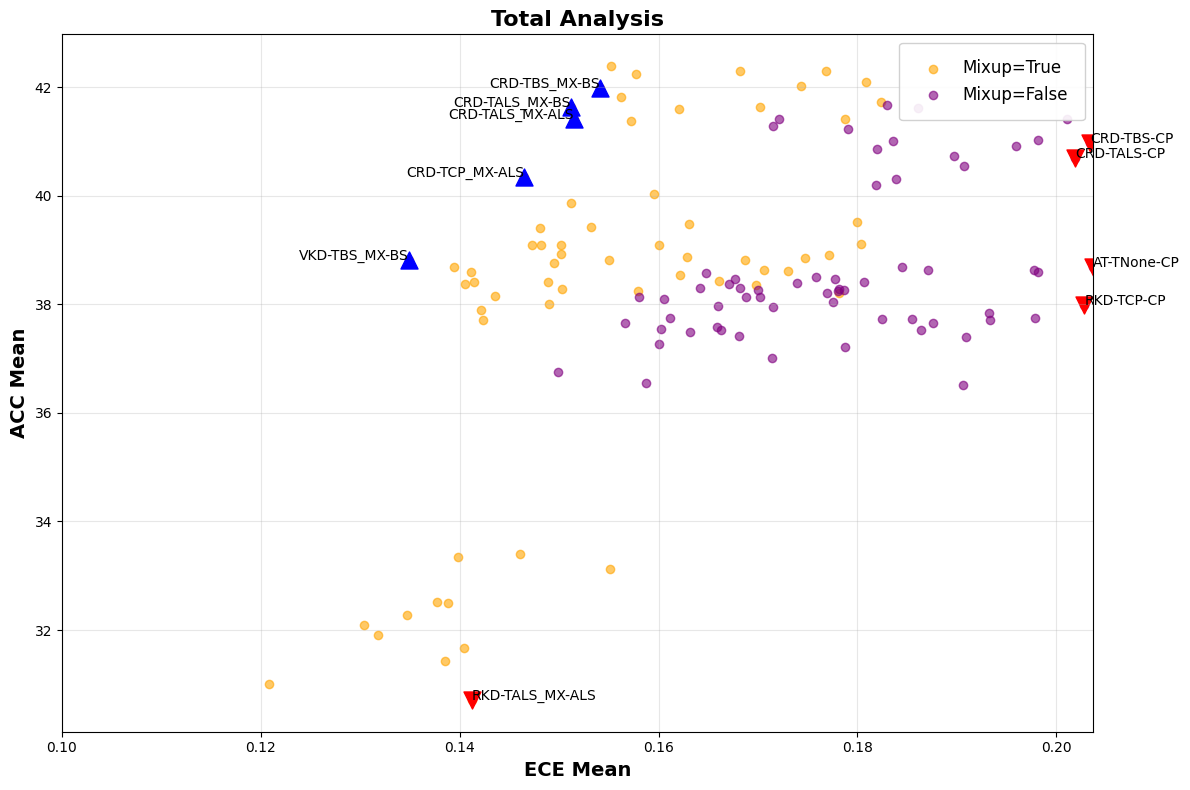

In [6]:
import matplotlib.pyplot as plt

# 그래프 생성
plt.figure(figsize=(12, 8))

# Mixup 여부에 따른 데이터 분리
mixup_true = df[df["Mixup"] == "Mixup=True"]
mixup_false = df[df["Mixup"] == "Mixup=False"]

# Mixup=True 데이터 표시
plt.scatter(mixup_true["ECE Mean"], mixup_true["ACC Mean"], color="orange", alpha=0.6, label="Mixup=True")

# Mixup=False 데이터 표시
plt.scatter(mixup_false["ECE Mean"], mixup_false["ACC Mean"], color="purple", alpha=0.6, label="Mixup=False")

# Top 5 Harmonic Scores 강조
for i, row in top_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="blue", marker="^", s=150, label="Top 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="right")

# Bottom 5 Harmonic Scores 강조
for i, row in bottom_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="red", marker="v", s=150, label="Bottom 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="left")

# 그래프 설정
plt.title("Total Analysis", fontsize=16, fontweight="bold")
plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
plt.xlim(0.10, df["ECE Mean"].max())
plt.legend(fontsize=12, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)
plt.grid(alpha=0.3)
plt.tight_layout()

# 그래프를 바탕화면에 저장
plt.savefig("/home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/analysis/total_analysis_graph.png", dpi=300)

# 그래프 표시
plt.show()


NameError: name 'acc_threshold' is not defined

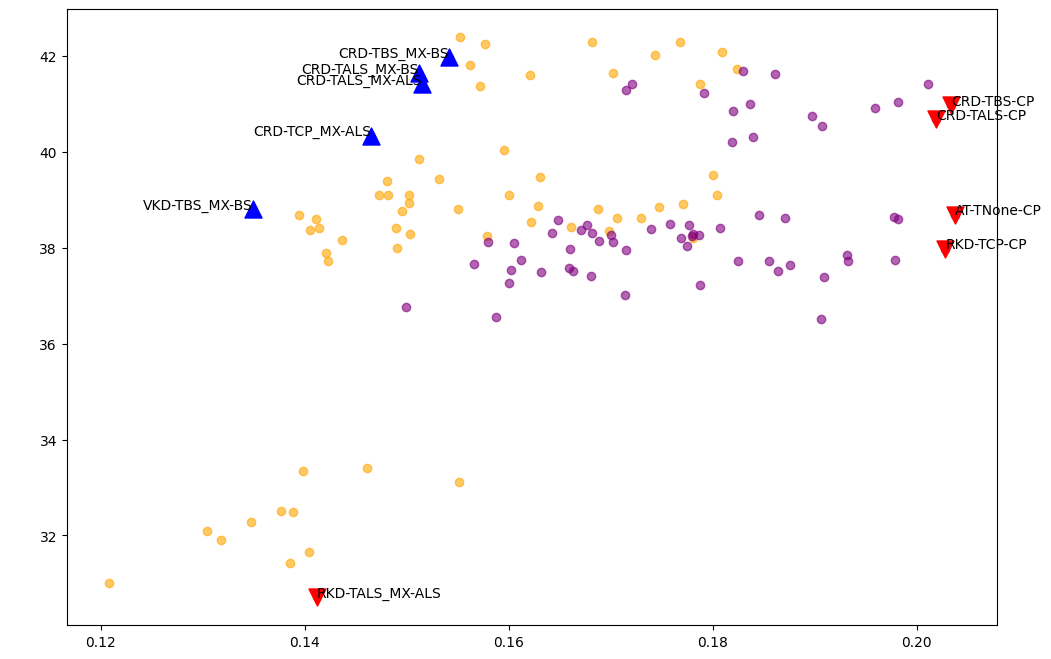

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Mixup 여부에 따른 데이터 분리
mixup_true = df[df["Mixup"] == "Mixup=True"]
mixup_false = df[df["Mixup"] == "Mixup=False"]

# Mixup=True 데이터 표시
plt.scatter(mixup_true["ECE Mean"], mixup_true["ACC Mean"], color="orange", alpha=0.6, label="Mixup=True")

# Mixup=False 데이터 표시
plt.scatter(mixup_false["ECE Mean"], mixup_false["ACC Mean"], color="purple", alpha=0.6, label="Mixup=False")

# Top 5 Harmonic Scores 강조
for i, row in top_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="blue", marker="^", s=150, label="Top 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="right")

# Bottom 5 Harmonic Scores 강조
for i, row in bottom_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="red", marker="v", s=150, label="Bottom 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="left")

# 왼쪽 위로 갈수록 좋은 방향 표시 (화살표)
plt.annotate(
    "Better Performance", 
    xy=(df["ECE Mean"].min() - 0.01, df["ACC Mean"].max() - 0.01), 
    xytext=(df["ECE Mean"].max() - 0.03, df["ACC Mean"].min() -0.02),
    arrowprops=dict(facecolor='black', arrowstyle="-|>", lw=1.5, mutation_scale=50),
    fontsize=12, fontweight="bold"
)

# Ideal Region 대신 설명 추가
plt.text(
    0.12, acc_threshold + 0.02, 
    "Left-Upper Indicates\nBetter Calibration and Accuracy",
    fontsize=12, color="green", fontweight="bold", bbox=dict(facecolor='white', alpha=0.8)
)

# 그래프 설정
plt.title("Total Analysis", fontsize=16, fontweight="bold")
plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
plt.xlim(0.10, df["ECE Mean"].max())
plt.legend(fontsize=12, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)
plt.grid(alpha=0.3)
plt.tight_layout()

# 그래프 표시
plt.show()


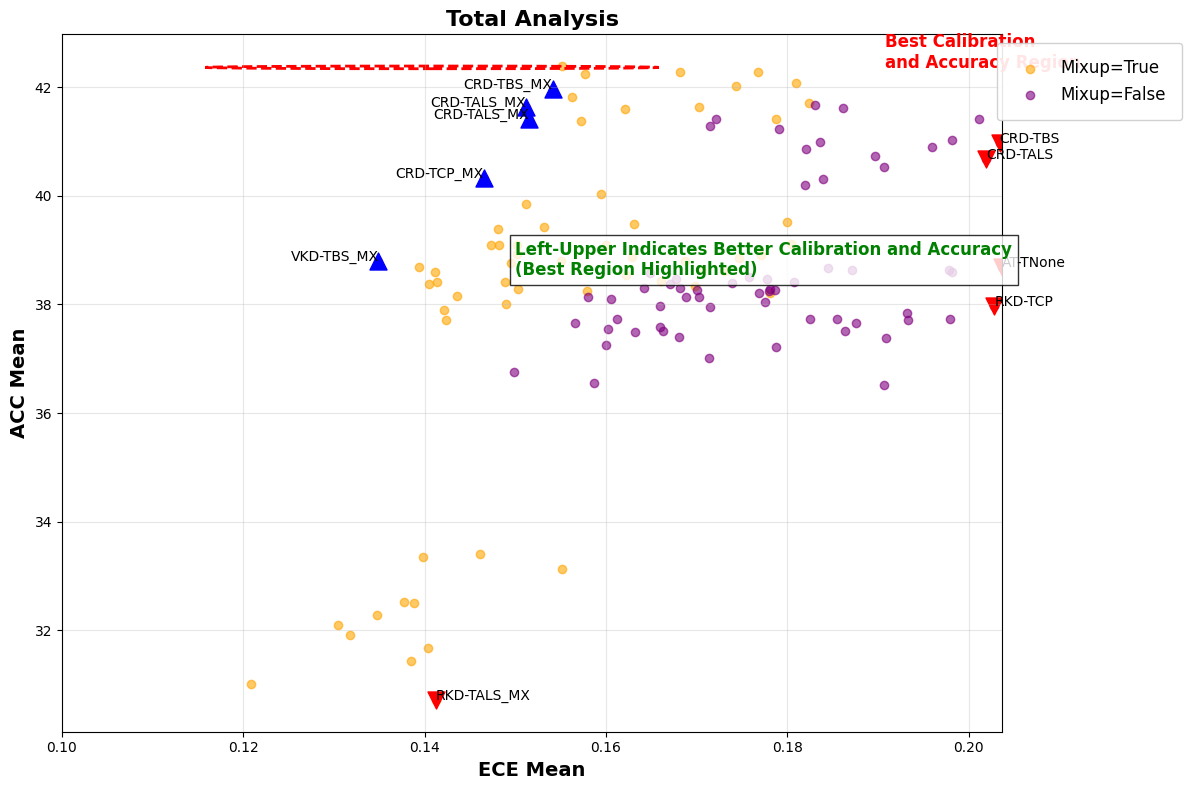

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.figure(figsize=(12, 8))

# Mixup 여부에 따른 데이터 분리
mixup_true = df[df["Mixup"] == "Mixup=True"]
mixup_false = df[df["Mixup"] == "Mixup=False"]

# Mixup=True 데이터 표시
plt.scatter(mixup_true["ECE Mean"], mixup_true["ACC Mean"], color="orange", alpha=0.6, label="Mixup=True")

# Mixup=False 데이터 표시
plt.scatter(mixup_false["ECE Mean"], mixup_false["ACC Mean"], color="purple", alpha=0.6, label="Mixup=False")

# Top 5 Harmonic Scores 강조
for i, row in top_5_normalized.iterrows():
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="blue", marker="^", s=150, label="Top 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], f"{row['KD Method']}-{row['Teacher Calibration']}", fontsize=10, ha="right")

# Bottom 5 Harmonic Scores 강조
for i, row in bottom_5_normalized.iterrows():
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="red", marker="v", s=150, label="Bottom 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], f"{row['KD Method']}-{row['Teacher Calibration']}", fontsize=10, ha="left")

# 동그라미로 영역 강조
ellipse = Ellipse(
    xy=(df["ECE Mean"].min() + 0.02, df["ACC Mean"].max() - 0.02),
    width=0.05, height=0.05,
    edgecolor="red", facecolor="none", linewidth=2, linestyle="--"
)
plt.gca().add_patch(ellipse)
plt.text(
    df["ECE Mean"].min() + 0.07, df["ACC Mean"].max() - 0.03,
    "Best Calibration\nand Accuracy Region",
    fontsize=12, fontweight="bold", color="red"
)

# 텍스트 설명 추가
plt.text(
    0.15, acc_threshold + 0.05,
    "Left-Upper Indicates Better Calibration and Accuracy\n(Best Region Highlighted)",
    fontsize=12, color="green", fontweight="bold", bbox=dict(facecolor='white', alpha=0.8)
)

# 그래프 설정
plt.title("Total Analysis", fontsize=16, fontweight="bold")
plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
plt.xlim(0.10, df["ECE Mean"].max())
plt.legend(fontsize=12, loc="upper right", bbox_to_anchor=(1.2, 1), frameon=True, framealpha=0.9, borderpad=1)
plt.grid(alpha=0.3)
plt.tight_layout()

# 그래프 표시
plt.show()
